In [1]:
args = {
    'comment': 'sc0.5 p768 + prostate shakal + OT + simmimv2 pretrain + harden augm',
    'current_fold': 3,
    'device': 'cuda:3',
    'debug': False,
    'short_name': 'coat-small',
    'output_folder': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/',
    'dataset': {
        'function': 'make_768_dataset',
        'n_cross_valid_splits': 5,
        'random_seed': 2022,
        'train_csv': './../data/train.csv',
        'train_images_dir': './../data/train_images_patches_768_overlap/',
        'train_masks_dir': './../data/train_masks_patches_768_overlap/',
        'spatial_size': 768,
        'dataset_class': 'hubmap_p768_organid',
        'augmentations': {
            'train': 'train_transform_b',
            'val': 'val_transform_a',
        }
    },
    'start_global_it': 50000,
    'start_epoch': 21,
    'model': {
        'encoder': 'coat_parallel_small_organ_token',
        'decoder': 'daformer_3x3_conv',
        'n_classes': 6,  # may not working if changed to 1
        'checkpoint_preload': {
            'function': 'load_encoder_pretrained',
            'args': {
                'path_to_checkpoint': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/checkpoint_fold_3/coat-small_ep_020_dice_0.759344_LAST.pt',
                'strict': False,
            }
            
        }
    },
    'batch_size': 4,
    'virtual_batch_size': 1,
    'base_lr': 4e-5,
    'optimizer': 'adamw',
    'optimizer_args': {
        'weight_decay': 5e-3,
    },
    'n_epochs': 80,
    'criterion_schedule': 'criterion_schedule_1',
    'lr_schedule_function': 'lr_function_a1',
    'aux_losses': [
        ('aux_serial_1', 0.2),
        ('aux_serial_2', 0.2),
        ('aux_serial_3', 0.2),
        ('aux_parallel_1', 0.2),
        ('aux_parallel_2', 0.4),
        ('aux_parallel_3', 0.1),
    ],
    'validation_function': 'validate_a1',
    'keep_last_n_checkpoints': {
        'function': 'keep_top_n_checkpoints_coat_by_ep',
        'n': 10,
    },
    'before_train': [
#         'freeze_encoder_a',
    ],
    'unfreeze_encoder': {
        'active': False,
        'n_epoch': 4
    },
    'swa_top_n': 5,
    'swa_device': 'cuda:1'
}

In [2]:
from swa.swa_base import make_swa_coat_a

/opt/conda/lib/python3.6/site-packages/albumentations/augmentations/dropout/cutout.py:52: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  FutureWarning,


COAT SWA depth 4 organ token.
Warning! This function may not be appliable to other models! Beware of shared weights!
12 0.757373
17 0.756828
19 0.759988
20 0.759344
24 0.762754
26 0.765026
27 0.773841
29 0.757921
30 0.764223
31 0.763323
--------------------------------------------------------------------------------
keeping top 5 checkpoints...
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_3/coat-small_ep_024_dice_0.762754.pt', 0.762754, 24)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_3/coat-small_ep_031_dice_0.763323.pt', 0.763323, 31)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_3/coat-small_ep_030_dice_0.764223.pt', 0.764223, 30)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_3/coat-small_ep_026_dice_0.765026.pt', 0.765026, 26)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_3/coat-small_ep_027_dice_0.773841.pt', 0.77384

replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.2.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.2.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.0.bias
replaced: encoder.parallel

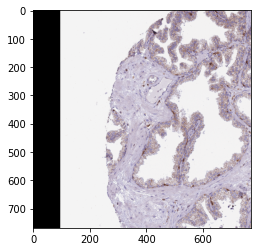

MASK
torch.Size([768, 768])
mask values:  tensor(0., device='cuda:1', dtype=torch.float64) tensor(2., device='cuda:1', dtype=torch.float64)


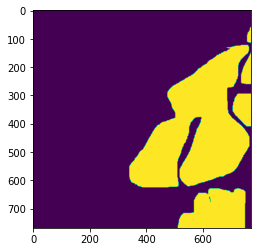

IMAGE
torch.Size([3, 768, 768])
image values:  0.027450982481241226 1.0


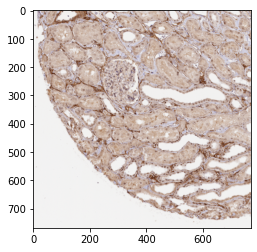

MASK
torch.Size([768, 768])
mask values:  tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)


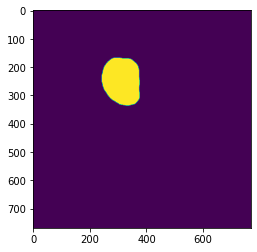

  Updating BN
0 / 6944


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


100 / 6944
200 / 6944
300 / 6944
400 / 6944
500 / 6944
600 / 6944
700 / 6944
800 / 6944
900 / 6944
1000 / 6944
1100 / 6944
1200 / 6944
1300 / 6944
1400 / 6944
1500 / 6944
1600 / 6944
1700 / 6944
1800 / 6944
1900 / 6944
2000 / 6944
2100 / 6944
2200 / 6944
2300 / 6944
2400 / 6944
2500 / 6944
2600 / 6944
2700 / 6944
2800 / 6944
2900 / 6944
3000 / 6944
3100 / 6944
3200 / 6944
3300 / 6944
3400 / 6944
3500 / 6944
3600 / 6944
3700 / 6944
3800 / 6944
3900 / 6944
4000 / 6944
4100 / 6944
4200 / 6944
4300 / 6944
4400 / 6944
4500 / 6944
4600 / 6944
4700 / 6944
4800 / 6944
4900 / 6944
5000 / 6944
5100 / 6944
5200 / 6944
5300 / 6944
5400 / 6944
5500 / 6944
5600 / 6944
5700 / 6944
5800 / 6944
5900 / 6944
6000 / 6944
6100 / 6944
6200 / 6944
6300 / 6944
6400 / 6944
6500 / 6944
6600 / 6944
6700 / 6944
6800 / 6944
6900 / 6944
  Saving swa checkpoint


In [3]:
make_swa_coat_a(args)

In [4]:
args = {
    'comment': 'sc0.5 p768 + prostate shakal + OT + simmimv2 pretrain + harden augm',
    'current_fold': 2,
    'device': 'cuda:2',
    'debug': False,
    'short_name': 'coat-small',
    'output_folder': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/',
    'dataset': {
        'function': 'make_768_dataset',
        'n_cross_valid_splits': 5,
        'random_seed': 2022,
        'train_csv': './../data/train.csv',
        'train_images_dir': './../data/train_images_patches_768_overlap/',
        'train_masks_dir': './../data/train_masks_patches_768_overlap/',
        'spatial_size': 768,
        'dataset_class': 'hubmap_p768_organid',
        'augmentations': {
            'train': 'train_transform_b',
            'val': 'val_transform_a',
        }
    },
    'start_global_it': 15000,
    'start_epoch': 12,
    'model': {
        'encoder': 'coat_parallel_small_organ_token',
        'decoder': 'daformer_3x3_conv',
        'n_classes': 6,  # may not working if changed to 1
        'checkpoint_preload': {
            'function': 'load_encoder_pretrained',
            'args': {
                'path_to_checkpoint': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/checkpoint_fold_2/coat-small_ep_010_dice_0.760553_LAST.pt',
                'strict': False,
            }
            
        }
    },
    'batch_size': 4,
    'virtual_batch_size': 1,
    'base_lr': 4e-5,
    'optimizer': 'adamw',
    'optimizer_args': {
        'weight_decay': 5e-3,
    },
    'n_epochs': 50,
    'criterion_schedule': 'criterion_schedule_1',
    'lr_schedule_function': 'lr_function_a1',
    'aux_losses': [
        ('aux_serial_1', 0.2),
        ('aux_serial_2', 0.2),
        ('aux_serial_3', 0.2),
        ('aux_parallel_1', 0.2),
        ('aux_parallel_2', 0.4),
        ('aux_parallel_3', 0.1),
    ],
    'validation_function': 'validate_a1',
    'keep_last_n_checkpoints': {
        'function': 'keep_top_n_checkpoints_coat_by_ep',
        'n': 10,
    },
    'before_train': [
#         'freeze_encoder_a',
    ],
    'unfreeze_encoder': {
        'active': False,
        'n_epoch': 4
    },
    'swa_top_n': 5,
    'swa_device': 'cuda:1'
}

COAT SWA depth 4 organ token.
Warning! This function may not be appliable to other models! Beware of shared weights!
8 0.759593
9 0.755937
10 0.760553
14 0.767913
15 0.759149
18 0.774317
20 0.759839
21 0.76583
22 0.786431
23 0.783984
--------------------------------------------------------------------------------
keeping top 5 checkpoints...
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_2/coat-small_ep_021_dice_0.765830.pt', 0.76583, 21)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_2/coat-small_ep_014_dice_0.767913.pt', 0.767913, 14)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_2/coat-small_ep_018_dice_0.774317.pt', 0.774317, 18)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_2/coat-small_ep_023_dice_0.783984.pt', 0.783984, 23)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_2/coat-small_ep_022_dice_0.786431.pt', 0.786431, 2

replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.2.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.2.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.2.weight
replaced: encoder.parall

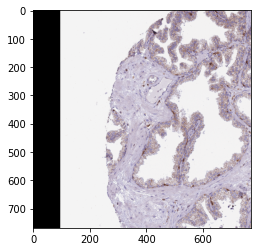

MASK
torch.Size([768, 768])
mask values:  tensor(0., device='cuda:1', dtype=torch.float64) tensor(2., device='cuda:1', dtype=torch.float64)


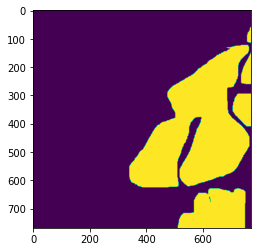

IMAGE
torch.Size([3, 768, 768])
image values:  0.0 0.960784375667572


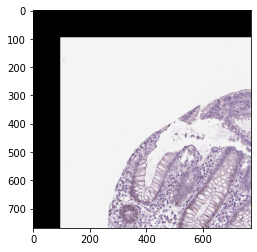

MASK
torch.Size([768, 768])
mask values:  tensor(0., dtype=torch.float64) tensor(3., dtype=torch.float64)


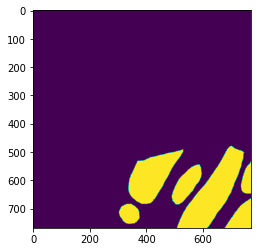

  Updating BN
0 / 6926


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


100 / 6926
200 / 6926
300 / 6926
400 / 6926
500 / 6926
600 / 6926
700 / 6926
800 / 6926
900 / 6926
1000 / 6926
1100 / 6926
1200 / 6926
1300 / 6926
1400 / 6926
1500 / 6926
1600 / 6926
1700 / 6926
1800 / 6926
1900 / 6926
2000 / 6926
2100 / 6926
2200 / 6926
2300 / 6926
2400 / 6926
2500 / 6926
2600 / 6926
2700 / 6926
2800 / 6926
2900 / 6926
3000 / 6926
3100 / 6926
3200 / 6926
3300 / 6926
3400 / 6926
3500 / 6926
3600 / 6926
3700 / 6926
3800 / 6926
3900 / 6926
4000 / 6926
4100 / 6926
4200 / 6926
4300 / 6926
4400 / 6926
4500 / 6926
4600 / 6926
4700 / 6926
4800 / 6926
4900 / 6926
5000 / 6926
5100 / 6926
5200 / 6926
5300 / 6926
5400 / 6926
5500 / 6926
5600 / 6926
5700 / 6926
5800 / 6926
5900 / 6926
6000 / 6926
6100 / 6926
6200 / 6926
6300 / 6926
6400 / 6926
6500 / 6926
6600 / 6926
6700 / 6926
6800 / 6926
6900 / 6926
  Saving swa checkpoint


In [5]:
make_swa_coat_a(args)

In [6]:
args = {
    'comment': 'sc0.5 p768 + prostate shakal + OT + simmimv2 pretrain + harden augm',
    'current_fold': 4,
    'device': 'cuda:0',
    'debug': False,
    'short_name': 'coat-small',
    'output_folder': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/',
    'dataset': {
        'function': 'make_768_dataset',
        'n_cross_valid_splits': 5,
        'random_seed': 2022,
        'train_csv': './../data/train.csv',
        'train_images_dir': './../data/train_images_patches_768_overlap/',
        'train_masks_dir': './../data/train_masks_patches_768_overlap/',
        'spatial_size': 768,
        'dataset_class': 'hubmap_p768_organid',
        'augmentations': {
            'train': 'train_transform_b',
            'val': 'val_transform_a',
        }
    },
    'start_global_it': 15000,
    'start_epoch': 11,
    'model': {
        'encoder': 'coat_parallel_small_organ_token',
        'decoder': 'daformer_3x3_conv',
        'n_classes': 6,  # may not working if changed to 1
        'checkpoint_preload': {
            'function': 'load_encoder_pretrained',
            'args': {
                'path_to_checkpoint': './coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/checkpoint_fold_4/coat-small_ep_010_dice_0.740380_LAST.pt',
                'strict': False,
            }
            
        }
    },
    'batch_size': 4,
    'virtual_batch_size': 1,
    'base_lr': 4e-5,
    'optimizer': 'adamw',
    'optimizer_args': {
        'weight_decay': 5e-3,
    },
    'n_epochs': 80,
    'criterion_schedule': 'criterion_schedule_1',
    'lr_schedule_function': 'lr_function_a1',
    'aux_losses': [
        ('aux_serial_1', 0.2),
        ('aux_serial_2', 0.2),
        ('aux_serial_3', 0.2),
        ('aux_parallel_1', 0.2),
        ('aux_parallel_2', 0.4),
        ('aux_parallel_3', 0.1),
    ],
    'validation_function': 'validate_a1',
    'keep_last_n_checkpoints': {
        'function': 'keep_top_n_checkpoints_coat_by_ep',
        'n': 10,
    },
    'before_train': [
#         'freeze_encoder_a',
    ],
    'unfreeze_encoder': {
        'active': False,
        'n_epoch': 4
    },
    'swa_top_n': 5,
    'swa_device': 'cuda:1'
}

COAT SWA depth 4 organ token.
Warning! This function may not be appliable to other models! Beware of shared weights!
11 0.774717
13 0.785493
15 0.787192
16 0.796485
17 0.794799
18 0.806984
19 0.803875
20 0.80354
21 0.790062
22 0.78353
--------------------------------------------------------------------------------
keeping top 5 checkpoints...
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_4/coat-small_ep_017_dice_0.794799.pt', 0.794799, 17)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_4/coat-small_ep_016_dice_0.796485.pt', 0.796485, 16)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_4/coat-small_ep_020_dice_0.803540.pt', 0.80354, 20)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_4/coat-small_ep_019_dice_0.803875.pt', 0.803875, 19)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv2-OT-prostate/./checkpoint_fold_4/coat-small_ep_018_dice_0.806984.pt', 0.806984, 

replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe4.crpe.conv_list.2.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe2.crpe.conv_list.2.bias
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.3.factoratt_crpe3.crpe.conv_list.0.bias
replaced: encoder.parallel

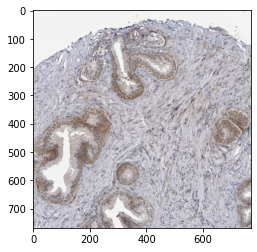

MASK
torch.Size([768, 768])
mask values:  tensor(0., device='cuda:1', dtype=torch.float64) tensor(2., device='cuda:1', dtype=torch.float64)


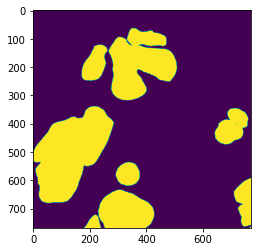

IMAGE
torch.Size([3, 768, 768])
image values:  0.09019608050584793 0.960784375667572


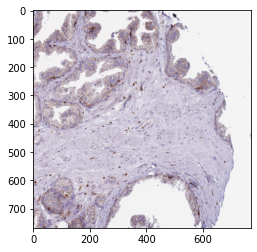

MASK
torch.Size([768, 768])
mask values:  tensor(0., dtype=torch.float64) tensor(2., dtype=torch.float64)


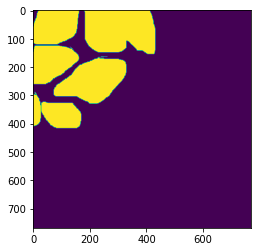

  Updating BN
0 / 6926


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


100 / 6926
200 / 6926
300 / 6926
400 / 6926
500 / 6926
600 / 6926
700 / 6926
800 / 6926
900 / 6926
1000 / 6926
1100 / 6926
1200 / 6926
1300 / 6926
1400 / 6926
1500 / 6926
1600 / 6926
1700 / 6926
1800 / 6926
1900 / 6926
2000 / 6926
2100 / 6926
2200 / 6926
2300 / 6926
2400 / 6926
2500 / 6926
2600 / 6926
2700 / 6926
2800 / 6926
2900 / 6926
3000 / 6926
3100 / 6926
3200 / 6926
3300 / 6926
3400 / 6926
3500 / 6926
3600 / 6926
3700 / 6926
3800 / 6926
3900 / 6926
4000 / 6926
4100 / 6926
4200 / 6926
4300 / 6926
4400 / 6926
4500 / 6926
4600 / 6926
4700 / 6926
4800 / 6926
4900 / 6926
5000 / 6926
5100 / 6926
5200 / 6926
5300 / 6926
5400 / 6926
5500 / 6926
5600 / 6926
5700 / 6926
5800 / 6926
5900 / 6926
6000 / 6926
6100 / 6926
6200 / 6926
6300 / 6926
6400 / 6926
6500 / 6926
6600 / 6926
6700 / 6926
6800 / 6926
6900 / 6926
  Saving swa checkpoint


In [7]:
make_swa_coat_a(args)

# swa coat unet

In [2]:
!nvidia-smi


Tue Sep 13 20:28:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.152.00   Driver Version: 418.152.00   CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   63C    P0   237W / 300W |  26871MiB / 32478MiB |     98%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  On   | 00000000:08:00.0 Off |                    0 |
| N/A   56C    P0    58W / 300W |   1905MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [1]:
from swa.swa_base import make_swa_coat_unet
from configs.config import *

/opt/conda/lib/python3.6/site-packages/albumentations/augmentations/dropout/cutout.py:52: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  FutureWarning,


In [5]:
args = read_args_from_config('./configs/coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080.json', 
                             fold=3, device='cuda:1')

In [ ]:
make_swa_coat_unet(args)

In [7]:
args = read_args_from_config('./configs/coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080.json', 
                             fold=2, device='cuda:1')

COAT SWA depth 4 organ token.
Warning! This function may not be appliable to other models! Beware of shared weights!
0 0.782067
1 0.77249
2 0.776555
3 0.781642
4 0.775194
5 0.784461
6 0.782142
7 0.782878
8 0.780847
9 0.775855
10 0.78034
11 0.77508
12 0.773505
13 0.781148
14 0.771898
--------------------------------------------------------------------------------
keeping top 5 checkpoints...
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_2/coat-small-unet_ep_003_dice_0.781642.pt', 0.781642, 3)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_2/coat-small-unet_ep_000_dice_0.782067.pt', 0.782067, 0)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_2/coat-small-unet_ep_006_dice_0.782142.pt', 0.782142, 6)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_2/coat-small-unet_ep_007_dice_0.782878.pt', 0.782878, 7)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/.

replaced: encoder.serial_blocks3.1.factoratt_crpe.qkv.bias
replaced: encoder.serial_blocks3.1.factoratt_crpe.proj.weight
replaced: encoder.serial_blocks3.1.factoratt_crpe.proj.bias
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.0.weight
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.0.bias
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.1.weight
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.1.bias
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.2.weight
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.2.bias
replaced: encoder.serial_blocks3.1.norm2.weight
replaced: encoder.serial_blocks3.1.norm2.bias
replaced: encoder.serial_blocks3.1.mlp.fc1.weight
replaced: encoder.serial_blocks3.1.mlp.fc1.bias
replaced: encoder.serial_blocks3.1.mlp.fc2.weight
replaced: encoder.serial_blocks3.1.mlp.fc2.bias
replaced: encoder.serial_blocks4.0.cpe.proj.weight
replaced: encoder.serial_blocks4.0.cpe.p

replaced: encoder.parallel_blocks.1.norm23.weight
replaced: encoder.parallel_blocks.1.norm23.bias
replaced: encoder.parallel_blocks.1.norm24.weight
replaced: encoder.parallel_blocks.1.norm24.bias
replaced: encoder.parallel_blocks.1.mlp2.fc1.weight
replaced: encoder.parallel_blocks.1.mlp2.fc1.bias
replaced: encoder.parallel_blocks.1.mlp2.fc2.weight
replaced: encoder.parallel_blocks.1.mlp2.fc2.bias
replaced: encoder.parallel_blocks.1.mlp3.fc1.weight
replaced: encoder.parallel_blocks.1.mlp3.fc1.bias
replaced: encoder.parallel_blocks.1.mlp3.fc2.weight
replaced: encoder.parallel_blocks.1.mlp3.fc2.bias
replaced: encoder.parallel_blocks.1.mlp4.fc1.weight
replaced: encoder.parallel_blocks.1.mlp4.fc1.bias
replaced: encoder.parallel_blocks.1.mlp4.fc2.weight
replaced: encoder.parallel_blocks.1.mlp4.fc2.bias
replaced: encoder.parallel_blocks.2.norm12.weight
replaced: encoder.parallel_blocks.2.norm12.bias
replaced: encoder.parallel_blocks.2.norm13.weight
replaced: encoder.parallel_blocks.2.norm13.b

replaced: encoder.parallel_blocks.4.factoratt_crpe4.qkv.bias
replaced: encoder.parallel_blocks.4.factoratt_crpe4.proj.weight
replaced: encoder.parallel_blocks.4.factoratt_crpe4.proj.bias
replaced: encoder.parallel_blocks.4.factoratt_crpe4.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.4.factoratt_crpe4.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.4.factoratt_crpe4.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.4.factoratt_crpe4.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.4.factoratt_crpe4.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.4.factoratt_crpe4.crpe.conv_list.2.bias
replaced: encoder.parallel_blocks.4.norm22.weight
replaced: encoder.parallel_blocks.4.norm22.bias
replaced: encoder.parallel_blocks.4.norm23.weight
replaced: encoder.parallel_blocks.4.norm23.bias
replaced: encoder.parallel_blocks.4.norm24.weight
replaced: encoder.parallel_blocks.4.norm24.bias
replaced: encoder.parallel_blocks.4.mlp2.fc1.weight
replaced: encoder

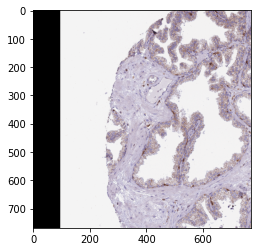

MASK
torch.Size([768, 768])
mask values:  tensor(0., device='cuda:1', dtype=torch.float64) tensor(2., device='cuda:1', dtype=torch.float64)


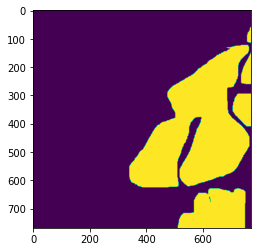

IMAGE
torch.Size([3, 768, 768])
image values:  0.0 0.960784375667572


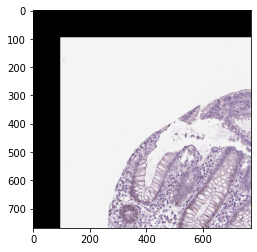

MASK
torch.Size([768, 768])
mask values:  tensor(0., dtype=torch.float64) tensor(3., dtype=torch.float64)


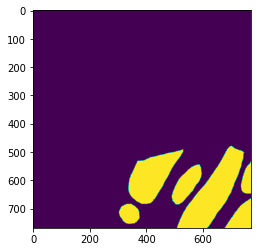

  Updating BN
0 / 6926


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


100 / 6926
200 / 6926
300 / 6926
400 / 6926
500 / 6926
600 / 6926
700 / 6926
800 / 6926
900 / 6926
1000 / 6926
1100 / 6926
1200 / 6926
1300 / 6926
1400 / 6926
1500 / 6926
1600 / 6926
1700 / 6926
1800 / 6926
1900 / 6926
2000 / 6926
2100 / 6926
2200 / 6926
2300 / 6926
2400 / 6926
2500 / 6926
2600 / 6926
2700 / 6926
2800 / 6926
2900 / 6926
3000 / 6926
3100 / 6926
3200 / 6926
3300 / 6926
3400 / 6926
3500 / 6926
3600 / 6926
3700 / 6926
3800 / 6926
3900 / 6926
4000 / 6926
4100 / 6926
4200 / 6926
4300 / 6926
4400 / 6926
4500 / 6926
4600 / 6926
4700 / 6926
4800 / 6926
4900 / 6926
5000 / 6926
5100 / 6926
5200 / 6926
5300 / 6926
5400 / 6926
5500 / 6926
5600 / 6926
5700 / 6926
5800 / 6926
5900 / 6926
6000 / 6926
6100 / 6926
6200 / 6926
6300 / 6926
6400 / 6926
6500 / 6926
6600 / 6926
6700 / 6926
6800 / 6926
6900 / 6926
  Saving swa checkpoint


In [8]:
make_swa_coat_unet(args)

In [9]:
args = read_args_from_config('./configs/coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080.json', 
                             fold=4, device='cuda:1')

COAT SWA depth 4 organ token.
Warning! This function may not be appliable to other models! Beware of shared weights!
0 0.800082
1 0.800504
2 0.802604
3 0.800575
4 0.801314
5 0.79824
6 0.804948
7 0.801695
8 0.800618
9 0.80523
10 0.80486
11 0.801689
13 0.802446
14 0.801849
15 0.800917
--------------------------------------------------------------------------------
keeping top 5 checkpoints...
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_4/coat-small-unet_ep_013_dice_0.802446.pt', 0.802446, 13)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_4/coat-small-unet_ep_002_dice_0.802604.pt', 0.802604, 2)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_4/coat-small-unet_ep_010_dice_0.804860.pt', 0.80486, 10)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/./checkpoint_fold_4/coat-small-unet_ep_006_dice_0.804948.pt', 0.804948, 6)
('./coat-sm-parallel-sc05-p768-pretrain-simmimv1-OT-ft-lb080/

replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.1.weight
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.1.bias
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.2.weight
replaced: encoder.serial_blocks3.1.factoratt_crpe.crpe.conv_list.2.bias
replaced: encoder.serial_blocks3.1.norm2.weight
replaced: encoder.serial_blocks3.1.norm2.bias
replaced: encoder.serial_blocks3.1.mlp.fc1.weight
replaced: encoder.serial_blocks3.1.mlp.fc1.bias
replaced: encoder.serial_blocks3.1.mlp.fc2.weight
replaced: encoder.serial_blocks3.1.mlp.fc2.bias
replaced: encoder.serial_blocks4.0.cpe.proj.weight
replaced: encoder.serial_blocks4.0.cpe.proj.bias
replaced: encoder.serial_blocks4.0.norm1.weight
replaced: encoder.serial_blocks4.0.norm1.bias
replaced: encoder.serial_blocks4.0.factoratt_crpe.qkv.weight
replaced: encoder.serial_blocks4.0.factoratt_crpe.qkv.bias
replaced: encoder.serial_blocks4.0.factoratt_crpe.proj.weight
replaced: encoder.serial_blocks4.0.factora

replaced: encoder.parallel_blocks.1.mlp4.fc1.bias
replaced: encoder.parallel_blocks.1.mlp4.fc2.weight
replaced: encoder.parallel_blocks.1.mlp4.fc2.bias
replaced: encoder.parallel_blocks.2.norm12.weight
replaced: encoder.parallel_blocks.2.norm12.bias
replaced: encoder.parallel_blocks.2.norm13.weight
replaced: encoder.parallel_blocks.2.norm13.bias
replaced: encoder.parallel_blocks.2.norm14.weight
replaced: encoder.parallel_blocks.2.norm14.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe2.qkv.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe2.qkv.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe2.proj.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe2.proj.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe2.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe2.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.2.factoratt_crpe2.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.2.factoratt_crpe2.crpe.conv_list.1.bias
repl

replaced: encoder.parallel_blocks.5.norm12.weight
replaced: encoder.parallel_blocks.5.norm12.bias
replaced: encoder.parallel_blocks.5.norm13.weight
replaced: encoder.parallel_blocks.5.norm13.bias
replaced: encoder.parallel_blocks.5.norm14.weight
replaced: encoder.parallel_blocks.5.norm14.bias
replaced: encoder.parallel_blocks.5.factoratt_crpe2.qkv.weight
replaced: encoder.parallel_blocks.5.factoratt_crpe2.qkv.bias
replaced: encoder.parallel_blocks.5.factoratt_crpe2.proj.weight
replaced: encoder.parallel_blocks.5.factoratt_crpe2.proj.bias
replaced: encoder.parallel_blocks.5.factoratt_crpe2.crpe.conv_list.0.weight
replaced: encoder.parallel_blocks.5.factoratt_crpe2.crpe.conv_list.0.bias
replaced: encoder.parallel_blocks.5.factoratt_crpe2.crpe.conv_list.1.weight
replaced: encoder.parallel_blocks.5.factoratt_crpe2.crpe.conv_list.1.bias
replaced: encoder.parallel_blocks.5.factoratt_crpe2.crpe.conv_list.2.weight
replaced: encoder.parallel_blocks.5.factoratt_crpe2.crpe.conv_list.2.bias
replac

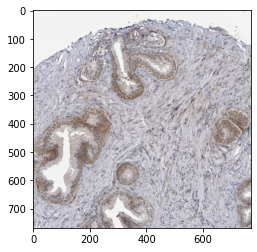

MASK
torch.Size([768, 768])
mask values:  tensor(0., device='cuda:1', dtype=torch.float64) tensor(2., device='cuda:1', dtype=torch.float64)


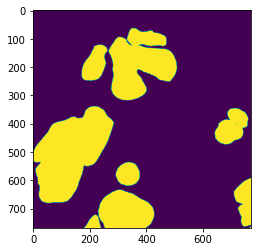

IMAGE
torch.Size([3, 768, 768])
image values:  0.09019608050584793 0.960784375667572


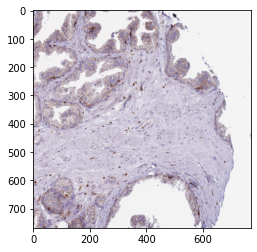

MASK
torch.Size([768, 768])
mask values:  tensor(0., dtype=torch.float64) tensor(2., dtype=torch.float64)


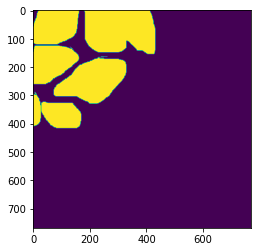

  Updating BN
0 / 6926


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


100 / 6926
200 / 6926
300 / 6926
400 / 6926
500 / 6926
600 / 6926
700 / 6926
800 / 6926
900 / 6926
1000 / 6926
1100 / 6926
1200 / 6926
1300 / 6926
1400 / 6926
1500 / 6926
1600 / 6926
1700 / 6926
1800 / 6926
1900 / 6926
2000 / 6926
2100 / 6926
2200 / 6926
2300 / 6926
2400 / 6926
2500 / 6926
2600 / 6926
2700 / 6926
2800 / 6926
2900 / 6926
3000 / 6926
3100 / 6926
3200 / 6926
3300 / 6926
3400 / 6926
3500 / 6926
3600 / 6926
3700 / 6926
3800 / 6926
3900 / 6926
4000 / 6926
4100 / 6926
4200 / 6926
4300 / 6926
4400 / 6926
4500 / 6926
4600 / 6926
4700 / 6926
4800 / 6926
4900 / 6926
5000 / 6926
5100 / 6926
5200 / 6926
5300 / 6926
5400 / 6926
5500 / 6926
5600 / 6926
5700 / 6926
5800 / 6926
5900 / 6926
6000 / 6926
6100 / 6926
6200 / 6926
6300 / 6926
6400 / 6926
6500 / 6926
6600 / 6926
6700 / 6926
6800 / 6926
6900 / 6926
  Saving swa checkpoint


In [10]:
make_swa_coat_unet(args)